In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14207 entries, 0 to 14206
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_number             14207 non-null  object 
 1   District_name           14207 non-null  object 
 2   Week_day                14207 non-null  object 
 3   Year                    14207 non-null  int64  
 4   Month_name              14207 non-null  object 
 5   Day_month               14207 non-null  int64  
 6   Shift                   14207 non-null  object 
 7   Time                    14207 non-null  int64  
 8   Type_of_vehicle         14207 non-null  object 
 9   Sex                     14207 non-null  object 
 10  Age                     14207 non-null  object 
 11  Person_type             14207 non-null  object 
 12  Injury_severity         14207 non-null  object 
 13  Day                     14207 non-null  object 
 14  Time_segment            14207 non-null

In [4]:
df['Injury_severity'].value_counts()

Injury_severity
Hospitalized         10271
Slight Assistance     3042
Slight                 540
Severe                 318
Dead                    35
Natural Death            1
Name: count, dtype: int64

In [5]:
y=df['Time_segment'].values

In [6]:
df['Time_segment'].value_counts()

Time_segment
Work Departure    4110
Morning           3268
Afternoon         3265
Work Entrance     2144
Leisure           1101
Early Morning      319
Name: count, dtype: int64

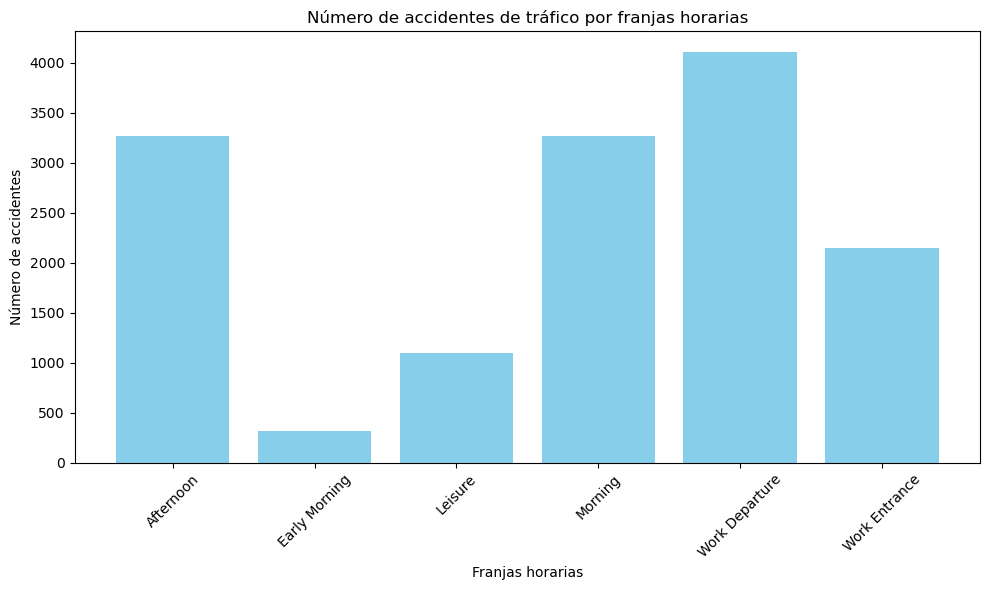

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

accidents_count = df.groupby('Time_segment').size().reset_index(name='Number of accidents')

plt.figure(figsize=(10, 6))
plt.bar(accidents_count['Time_segment'], accidents_count['Number of accidents'], color='skyblue')
plt.xlabel('Franjas horarias')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes de tráfico por franjas horarias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


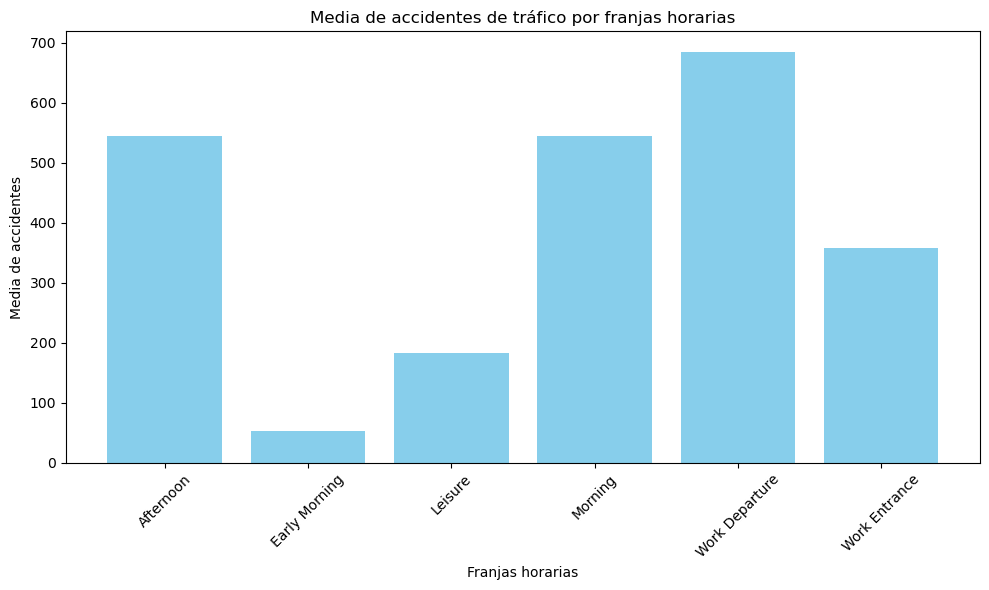

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

mean_accidents = df.groupby('Time_segment').size().reset_index(name='Total_accidents')
mean_accidents['Mean_accidents'] = mean_accidents['Total_accidents'] / len(df['Time_segment'].unique())

plt.figure(figsize=(10, 6))
plt.bar(mean_accidents['Time_segment'], mean_accidents['Mean_accidents'], color='skyblue')
plt.xlabel('Franjas horarias')
plt.ylabel('Media de accidentes')
plt.title('Media de accidentes de tráfico por franjas horarias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


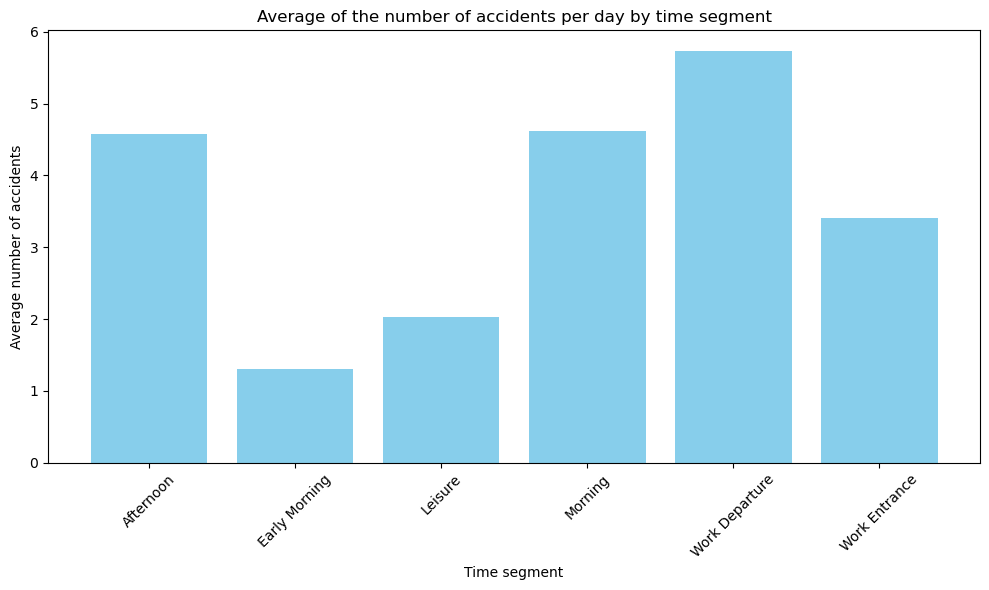

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

mean_accidents_per_day_per_segment = df.groupby(['Day', 'Time_segment']).size().groupby('Time_segment').mean().reset_index(name='Mean_accidents')

plt.figure(figsize=(10, 6))
plt.bar(mean_accidents_per_day_per_segment['Time_segment'], mean_accidents_per_day_per_segment['Mean_accidents'], color='skyblue')
plt.xlabel('Time segment')
plt.ylabel('Average number of accidents')
plt.title('Average of the number of accidents per day by time segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


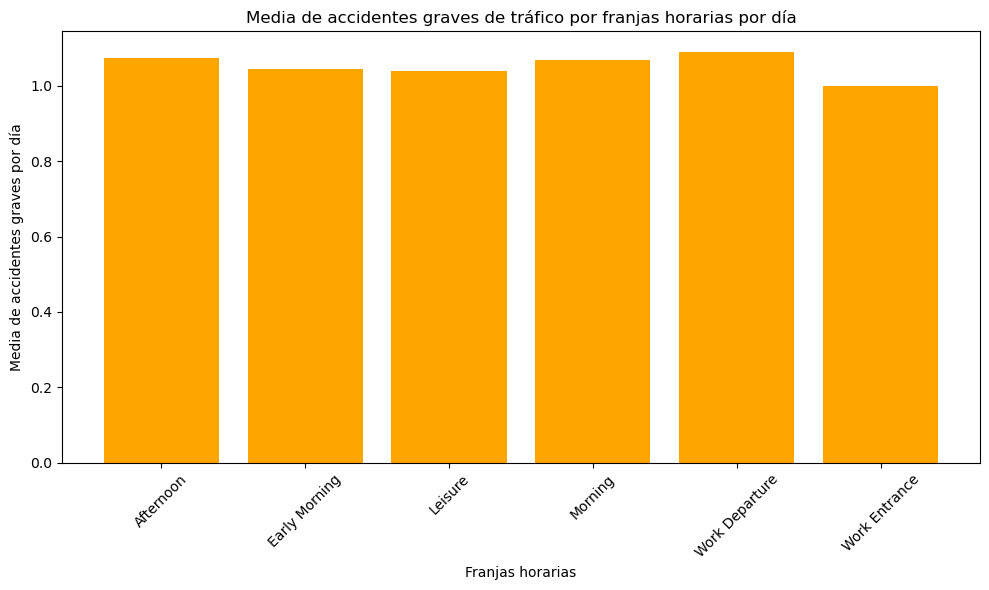

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

severe_accidents = df[df['Injury_severity'].isin(['Dead', 'Severe'])]

mean_severe_accidents_per_day_per_segment = severe_accidents.groupby(['Day', 'Time_segment']).size().groupby('Time_segment').mean().reset_index(name='Mean_severe_accidents')

plt.figure(figsize=(10, 6))
plt.bar(mean_severe_accidents_per_day_per_segment['Time_segment'], mean_severe_accidents_per_day_per_segment['Mean_severe_accidents'], color='orange')
plt.xlabel('Franjas horarias')
plt.ylabel('Media de accidentes graves por día')
plt.title('Media de accidentes graves de tráfico por franjas horarias por día')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

most_severe_injuries = df[df['Injury_severity'].isin(['Dead', 'Severely injured'])]

count_severe_injuries = most_severe_injuries.groupby('Time_segment').size().reset_index(name='Total_severe_injuries')

count_all_injuries = df.groupby('Time_segment').size().reset_index(name='Total_injuries')

result = pd.merge(count_all_injuries, count_severe_injuries, on='Time_segment')

result['Percentage_severe_injuries'] = (result['Total_severe_injuries'] / result['Total_injuries']) * 100

print(result)

     Time_segment  Total_injuries  Total_severe_injuries  \
0       Afternoon            3265                      5   
1   Early Morning             319                      5   
2         Leisure            1101                      5   
3         Morning            3268                      7   
4  Work Departure            4110                      8   
5   Work Entrance            2144                      5   

   Percentage_severe_injuries  
0                    0.153139  
1                    1.567398  
2                    0.454133  
3                    0.214198  
4                    0.194647  
5                    0.233209  
